# Food recognition

In [4]:
import tensorflow as tf
import os
from keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing import image
import shutil
import matplotlib.pyplot as plt
from keras.applications import VGG16
import keras
import numpy as np

In [5]:
# Creation of the folders with the data for the training and the test 
base_dir = "./Data/training_test"
if not os.path.exists(base_dir):
            os.mkdir(base_dir)      
train_dir = os.path.join(base_dir,'train')
if not os.path.exists(train_dir):
    os.mkdir(train_dir)
validation_dir = os.path.join(base_dir,'validation')
if not os.path.exists(validation_dir):
    os.mkdir(validation_dir)
test_dir = os.path.join(base_dir,'test')
if not os.path.exists(test_dir):
    os.mkdir(test_dir)

In [6]:
items = ('sashimi', 'spaghetti_bolognese')
directories = ('train', 'validation', 'test')
for i in items:
    for j in directories:
        path = os.path.join(base_dir,j)
        path = os.path.join(path,i)
        if not os.path.exists(path):
            os.mkdir(path)        

In [7]:
# create the training datase
dir_orig_data = "./Data/original_dataset"
for i in items:
    path_to_copy = os.path.join(dir_orig_data,i)
    files = os.listdir(path_to_copy)
    try:
        files.remove('.ipynb_checkpoints')
    except:
        pass
    files = files[0:700]
    path_to_past = os.path.join(base_dir, 'train')
    path_to_past = os.path.join(path_to_past, i)
    for j in files:
        path_file= os.path.join(path_to_past,j)
        file = os.path.join(path_to_copy,j)
        shutil.copyfile(file, path_file)

In [8]:
# create the test dataset
dir_orig_data = "./Data/original_dataset"
for i in items:
    path_to_copy = os.path.join(dir_orig_data,i)
    files = os.listdir(path_to_copy)
    try:
        files.remove('.ipynb_checkpoints')
    except:
        pass
    files = files[700:850]
    path_to_past = os.path.join(base_dir, 'test')
    path_to_past = os.path.join(path_to_past, i)
    for j in files:
        path_file= os.path.join(path_to_past,j)
        file = os.path.join(path_to_copy,j)
        shutil.copyfile(file, path_file)

In [9]:
# create the validation dataset
dir_orig_data = "./Data/original_dataset"
for i in items:
    path_to_copy = os.path.join(dir_orig_data,i)
    files = os.listdir(path_to_copy)
    try:
        files.remove('.ipynb_checkpoints')
    except:
        pass
    files = files[850:1000]
    path_to_past = os.path.join(base_dir, 'validation')
    path_to_past = os.path.join(path_to_past, i)
    for j in files:
        path_file= os.path.join(path_to_past,j)
        file = os.path.join(path_to_copy,j)
        shutil.copyfile(file, path_file)

# First Model 

In [10]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
train_generator = train_datagen.flow_from_directory(
train_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary'    
)

Found 1400 images belonging to 2 classes.


In [12]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary'    
)

Found 300 images belonging to 2 classes.


In [ ]:
# Convolutional layers of the model
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation = 'relu', input_shape = (150,150,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())

In [ ]:
# Ann
model.add(layers.Dense(512,activation = 'relu'))
model.add(layers.Dense(1,activation = 'sigmoid'))

In [ ]:
# Deciding the optimizer
model.compile(loss = 'binary_crossentropy', optimizer = optimizers.RMSprop(lr = 1e-4), metrics = 'acc')

In [ ]:
# fit the data with the model
history = model.fit(
train_generator,
    steps_per_epoch = 70,
    epochs = 30,
    validation_data = test_generator,
    validation_steps = 15
    
)

In [ ]:
# Plot the results 
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Second Model

In [ ]:
datagen = ImageDataGenerator(
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

In [ ]:
path_image = "Data\original_dataset\sashimi"
image_name =  os.listdir(path_image)[4]
path_image = os.path.join(path_image,image_name)
img = image.load_img(path_image, target_size = (150,150))
img

In [ ]:
x = image.img_to_array(img)
x = x.reshape((1,)+ x.shape)

In [ ]:
i = 0
for batch in datagen.flow(x, batch_size = 1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 8 == 0:
        break
plt.show()

In [ ]:
train_datagen2 = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

In [ ]:
test_datagen2 = ImageDataGenerator( rescale = 1./255)

In [ ]:
train_generator2 = train_datagen2.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary'    
)

In [ ]:
validation_generator2 = test_datagen2.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary'    
)

In [ ]:
# Convolutional layers
model2 = models.Sequential()
model2.add(layers.Conv2D(32,(3,3), activation = 'relu', input_shape = (150,150,3)))
model2.add(layers.MaxPooling2D(2,2))
model2.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model2.add(layers.MaxPooling2D(2,2))
model2.add(layers.Conv2D(128,(3,3), activation = 'relu'))
model2.add(layers.MaxPooling2D(2,2))
model2.add(layers.Conv2D(128,(3,3), activation = 'relu'))
model2.add(layers.MaxPooling2D(2,2))
model2.add(layers.Flatten())
model2.add(layers.Dropout(0.2))

In [ ]:
# Ann
model2.add(layers.Dense(512,activation = 'relu'))
model2.add(layers.Dense(1,activation = 'sigmoid'))

In [ ]:
# Deciding the optimizer
model2.compile(loss = 'binary_crossentropy', optimizer = optimizers.RMSprop(lr = 1e-4), metrics = 'acc')

In [ ]:
history2 = model2.fit_generator(
    train_generator2,
    steps_per_epoch = 70,
    epochs = 50,
    validation_data = validation_generator2,
    validation_steps = 15
)

In [ ]:
model2.save('food_recognition_model2')

In [ ]:
history2 = history

In [13]:
# Plot the loss and accuray fpr the training and validation

# Get the values from the models
acc = history2.history['acc']
val_acc = history2.history['val_acc']
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(1, len(acc) + 1)

# plot the accuracy
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

# Plot the loss
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

NameError: name 'history2' is not defined

In [14]:
conv_base = VGG16(weights = 'imagenet',
                 include_top = False,
                 input_shape = (150,150,3)
                 )

In [15]:
datagen = ImageDataGenerator(rescale = 1/255)
batch_size = 20

def extract_features(directory, sample_count):
   features = np.zeros(shape=(sample_count, 4, 4, 512))
   labels = np.zeros(shape=(sample_count))
   generator = datagen.flow_from_directory(
                       directory,
                       target_size=(150, 150),
                       batch_size=batch_size,
                       class_mode='binary')
   i = 0
   for inputs_batch, labels_batch in generator:
       features_batch = conv_base.predict(inputs_batch)
       features[i * batch_size : (i + 1) * batch_size] = features_batch
       labels[i * batch_size : (i + 1) * batch_size] = labels_batch
       i = i + 1
       if i * batch_size >= sample_count:
           break
   return features, labels

train_features, train_labels = extract_features(train_dir, 1400)
validation_features, validation_labels = extract_features(validation_dir, 300)
test_features, test_labels = extract_features(test_dir, 300)

Found 1400 images belonging to 2 classes.
Found 300 images belonging to 2 classes.
Found 300 images belonging to 2 classes.


In [16]:
train_features = np.reshape(train_features, (1400, 4*4*512))
validation_features = np.reshape(validation_features, (300, 4*4*512))
test_features = np.reshape(test_features, (300, 4*4*512))

In [17]:
model3 = models.Sequential()
model3.add(layers.Dense(256, activation = 'relu', input_dim = 4*4*512))
model3.add(layers.Dropout(0.2))
model3.add(layers.Dense(1, activation = 'sigmoid'))

In [18]:
model3.compile(loss = 'binary_crossentropy', optimizer = optimizers.RMSprop(lr = 2e-5), metrics = 'acc')

In [26]:
model3.save('Models/model3.h5')
#model3 = keras.models.load_model('Models/model3.h5')

In [19]:
history3 = model3.fit(train_features, train_labels,
                    epochs = 30,
                    batch_size = 20,
                    validation_data = (validation_features, validation_labels)
                    )

Epoch 1/30
70/70 [==============================] - 1s 14ms/step - loss: 0.5035 - acc: 0.7869 - val_loss: 0.2591 - val_acc: 0.9300
Epoch 2/30
70/70 [==============================] - 1s 13ms/step - loss: 0.2217 - acc: 0.9529 - val_loss: 0.2044 - val_acc: 0.9167
Epoch 3/30
70/70 [==============================] - 1s 13ms/step - loss: 0.1585 - acc: 0.9504 - val_loss: 0.1545 - val_acc: 0.9433
Epoch 4/30
70/70 [==============================] - 1s 13ms/step - loss: 0.1351 - acc: 0.9552 - val_loss: 0.1362 - val_acc: 0.9500
Epoch 5/30
70/70 [==============================] - 1s 13ms/step - loss: 0.1179 - acc: 0.9640 - val_loss: 0.1295 - val_acc: 0.9600
Epoch 6/30
70/70 [==============================] - 1s 13ms/step - loss: 0.0883 - acc: 0.9738 - val_loss: 0.1227 - val_acc: 0.9600
Epoch 7/30
70/70 [==============================] - 1s 13ms/step - loss: 0.0676 - acc: 0.9808 - val_loss: 0.1206 - val_acc: 0.9567
Epoch 8/30
70/70 [==============================] - 1s 13ms/step - loss: 0.0850 - a

In [38]:
def plot_acc_loss(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

    

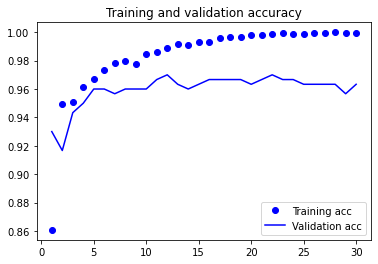

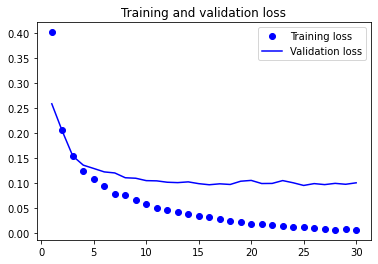

In [20]:
# Plot the results 
history = history3
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Fourth model

In [34]:
model4 = models.Sequential()
model4.add(conv_base)
model4.add(layers.Flatten())
model4.add(layers.Dense(256, activation = 'relu'))
model4.add(layers.Dense(1, activation = 'sigmoid'))
conv_base.trainable = False


In [29]:
train_datagen4 = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

In [30]:
test_datagen4 = ImageDataGenerator( rescale = 1./255)

In [32]:
train_generator4 = train_datagen4.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary'    
)

Found 1400 images belonging to 2 classes.


In [33]:
validation_generator4 = test_datagen4.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary'    
)

Found 300 images belonging to 2 classes.


In [37]:
model4.compile(
    loss = 'binary_crossentropy',
    optimizer = optimizers.RMSprop(lr = 2e-5),
    metrics = ['acc']
)
history4 = model4.fit_generator(
    train_generator4,
    steps_per_epoch = 70,
    epochs = 3,
    validation_data = validation_generator4,
    validation_steps = 15
    
)

C:\Users\elena.bonan\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/3
70/70 [==============================] - 53s 758ms/step - loss: 0.5508 - acc: 0.7547 - val_loss: 0.2672 - val_acc: 0.9300
Epoch 2/3
70/70 [==============================] - 60s 859ms/step - loss: 0.2721 - acc: 0.9213 - val_loss: 0.1847 - val_acc: 0.9433
Epoch 3/3
70/70 [==============================] - 63s 903ms/step - loss: 0.2068 - acc: 0.9336 - val_loss: 0.1553 - val_acc: 0.9467


In [39]:
model4.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


#  Fifth model

In [40]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable == True:
        layer.trainable = True
    else:
        layer.trainable = False
    

In [47]:
model5 = model4
model5.compile(loss = 'binary_crossentropy',
               optimizer = optimizers.RMSprop(lr = 1e-5), 
               metrics = ['acc'])
history5 = model5.fit_generator(
    train_generator4,
    steps_per_epoch = 70,
    epochs = 5,
    validation_data = validation_generator4,
    validation_steps = 15)

Epoch 1/5
70/70 [==============================] - 67s 949ms/step - loss: 0.1493 - acc: 0.9542 - val_loss: 0.0932 - val_acc: 0.9633
Epoch 2/5
70/70 [==============================] - 74s 1s/step - loss: 0.1070 - acc: 0.9630 - val_loss: 0.0792 - val_acc: 0.9633
Epoch 3/5
70/70 [==============================] - 81s 1s/step - loss: 0.0955 - acc: 0.9648 - val_loss: 0.1668 - val_acc: 0.9400
Epoch 4/5
70/70 [==============================] - 82s 1s/step - loss: 0.0893 - acc: 0.9730 - val_loss: 0.0517 - val_acc: 0.9800
Epoch 5/5
70/70 [==============================] - 83s 1s/step - loss: 0.0673 - acc: 0.9777 - val_loss: 0.1171 - val_acc: 0.9567


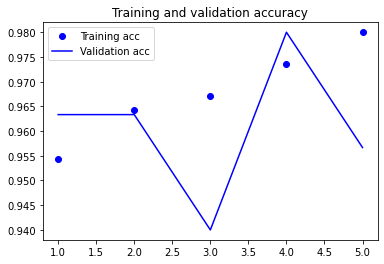

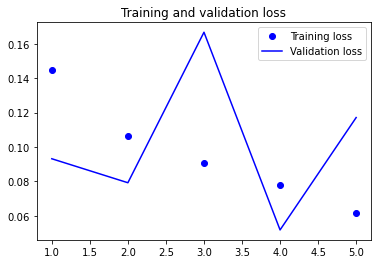

In [49]:
plot_acc_loss(history5)

In [61]:
def smooth_curve(points, factor = 0.8 ):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous*factor+ point*(1-factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

In [65]:
def plot_acc_loss_smooth(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)
    plt.plot(epochs, smooth_curve(acc), 'bo', label='Smoothed training acc')
    plt.plot(epochs, smooth_curve(val_acc), 'b', label='Smoothed validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()
    plt.plot(epochs, smooth_curve(loss), 'bo', label='Smoothed training loss')
    plt.plot(epochs, smooth_curve(val_loss), 'b', label='Smoothed validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

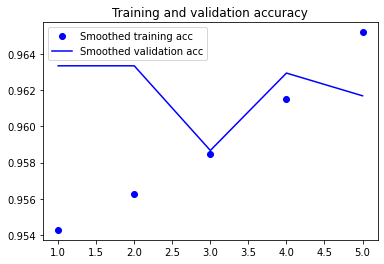

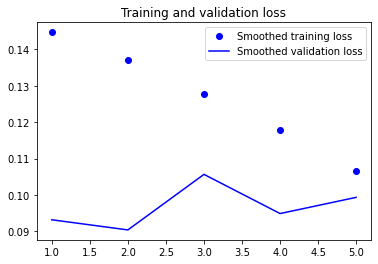

In [66]:
plot_acc_loss_smooth(history5)

In [54]:
test_generator = test_datagen.flow_from_directory(
    test_dir ,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary')
test_loss, test_acc = model5.evaluate_generator(test_generator, steps = 15)
print('test acc', test_acc)

Found 300 images belonging to 2 classes.


C:\Users\elena.bonan\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


test acc 0.9833333492279053
